# Testing Eager Learning Algorithms
* Logistic Regression
* Support Vector Machine
* Decision Trees

In [28]:
# Import needed libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.original

In [29]:
# Drop missing values
df = df.dropna()
df = df.reset_index(drop=True)

# Binarize data
df.loc[df['num'] != 0, 'num'] = 1

In [30]:
# Define features and target vectors
X = df.iloc[:,:-1].values
y = df['num'].values

In [31]:
# Split train and test data
Test_Size = 0.2
Random_Seed = 82024

index = list(range(y.size))
train_index, test_index = train_test_split(index, test_size=Test_Size, random_state=Random_Seed)

train_df = df.loc[train_index]
test_df = df.loc[test_index]

In [32]:
# Create PyTorch tensors for X and y
train_X = torch.tensor(train_df.iloc[:,:-1].values)
train_y = torch.tensor(train_df['num'].values).double()

test_X = torch.tensor(test_df.iloc[:,:-1].values)
test_y = torch.tensor(test_df['num'].values).double()

### Logistic Regression:

In [33]:
# Import specifics
from sklearn.linear_model import LogisticRegression

In [34]:
# Create model
model = LogisticRegression(random_state=Random_Seed)

In [35]:
# Train model
model.fit(train_X, train_y)

C:\Users\sarah220043\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=82024)

In [36]:
# Test model
y_pred = model.predict(test_X)

pred_probs = model.predict_proba(test_X)

# Evaluation:
acc = accuracy_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.78
AUC-ROC: 0.89


## Support Vector Machines:

Suport Vector Machines(SVMs) are machine learning algorithms that work by finding a hyperplane to separate data into classes

**The advantages of support vector machines are:**

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function as in Gaussian Process Models.

**The disadvantages of support vector machines include:**

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates.

In [37]:
# Import specifics
from sklearn import svm

### SVC classification SVM implementation:

In [38]:
# Create model
model = svm.SVC(random_state=Random_Seed)

In [39]:
# Train model
model.fit(train_X, train_y)

SVC(random_state=82024)

In [40]:
# Test model
y_pred = model.predict(test_X)

#pred_probs = model.predict_proba(test_X)

# Evaluation:
acc = accuracy_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.65
AUC-ROC: 0.64


### NuSVC classification SVM implementation:

In [41]:
# Create model
model = svm.NuSVC(random_state=Random_Seed)

In [42]:
# Train model
model.fit(train_X, train_y)

NuSVC(random_state=82024)

In [43]:
# Test model
y_pred = model.predict(test_X)

#pred_probs = model.predict_proba(test_X)

# Evaluation:
acc = accuracy_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.78
AUC-ROC: 0.78


### LinearSVC classification SVM implementation:

In [44]:
# Create model
model = svm.LinearSVC(random_state=Random_Seed)

In [45]:
# Train model
model.fit(train_X, train_y)

LinearSVC(random_state=82024)

In [46]:
# Test model
y_pred = model.predict(test_X)

#pred_probs = model.predict_proba(test_X)

# Evaluation:
acc = accuracy_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.82
AUC-ROC: 0.81


## Decision Tree:

In [47]:
# Import specifics
from sklearn import tree

In [48]:
# Create model
model = tree.DecisionTreeClassifier(random_state=Random_Seed)

In [49]:
# Train model
model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=82024)

In [50]:
# Test model
y_pred = model.predict(test_X)

pred_probs = model.predict_proba(test_X)

# Evaluation:
acc = accuracy_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.72
AUC-ROC: 0.71


[Text(0.5747282608695652, 0.9444444444444444, 'x[12] <= 4.5\ngini = 0.497\nsamples = 237\nvalue = [127, 110]'),
 Text(0.33967391304347827, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.347\nsamples = 130\nvalue = [101, 29]'),
 Text(0.45720108695652173, 0.8888888888888888, 'True  '),
 Text(0.21195652173913043, 0.7222222222222222, 'x[3] <= 157.0\ngini = 0.178\nsamples = 91\nvalue = [82, 9]'),
 Text(0.14130434782608695, 0.6111111111111112, 'x[0] <= 57.5\ngini = 0.128\nsamples = 87\nvalue = [81, 6]'),
 Text(0.06521739130434782, 0.5, 'x[3] <= 109.0\ngini = 0.032\nsamples = 62\nvalue = [61, 1]'),
 Text(0.043478260869565216, 0.3888888888888889, 'x[3] <= 106.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.021739130434782608, 0.2777777777777778, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.06521739130434782, 0.2777777777777778, 'x[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.043478260869565216, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Tex

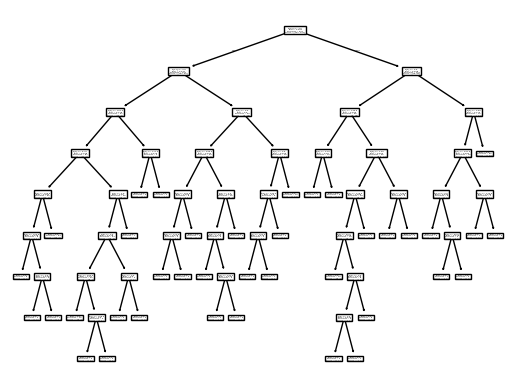

In [23]:
tree.plot_tree(model)

### References:
* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html